In [15]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
import re
from sklearn.decomposition import PCA

In [2]:
Data = pd.read_excel('E:/NLP/Dataset/text-clustering-dataset/Text.xlsx', header = None)

In [3]:
Data.to_csv('data.csv', encoding='utf-8')

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.shape

(200, 2)

In [6]:
data.columns= ['Id', 'Text']

In [7]:
data.head()

,Id,Text
0,0,Claxton hunting first major medal\n\nBritish h...
1,1,O'Sullivan could run in Worlds\n\nSonia O'Sull...
2,2,Greene sets sights on world title\n\nMaurice G...
3,3,IAAF launches fight against drugs\n\nThe IAAF ...
4,4,"Dibaba breaks 5,000m world record\n\nEthiopia'..."


In [8]:
data['Length'] = data['Text'].apply(len)

In [9]:
data.head()

,Id,Text,Length
0,0,Claxton hunting first major medal\n\nBritish h...,1238
1,1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,902
2,2,Greene sets sights on world title\n\nMaurice G...,2045
3,3,IAAF launches fight against drugs\n\nThe IAAF ...,1125
4,4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",939


Text(0.5, 1.0, 'The Distribution of Length over the Texts')

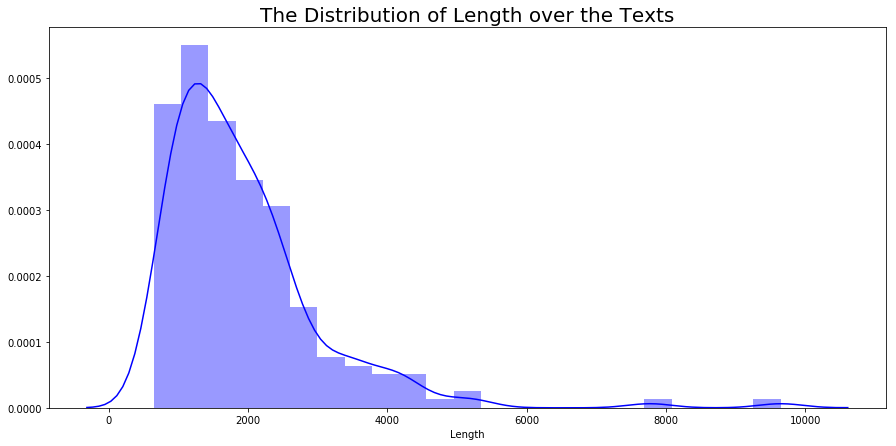

In [10]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(data['Length'], color = 'blue')
plt.title('The Distribution of Length over the Texts', fontsize = 20)

In [11]:
#!pip install wordcloud
from wordcloud import WordCloud

Text(0.5, 1.0, 'WordCloud ')

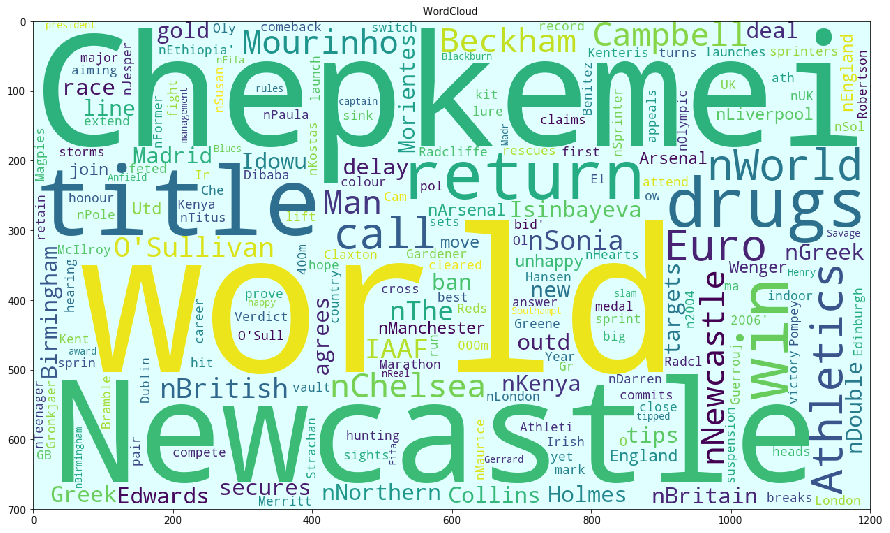

In [12]:
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(data['Text']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 10)

In [13]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:
corpus = []

for i in range(0, 200):
    review = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit_transform(data['Text'])

# getting the shape of X
print("Shape of X :", X.shape)

CountVectors = CountVectorizer(analyzer = 'word', max_features = 2000, lowercase=True, preprocessor=None, tokenizer=None, stop_words = 'english')
X_new = CountVectors.fit_transform(data['Text'])
print("Shape of X :", X_new.shape)

Shape of X : (200, 2000)
Shape of X : (200, 2000)


Inertia Score for Kmeans 185.73763389297827
Inertia Score for Kmeans 172.0887223712324
Inertia Score for Kmeans 163.00294720689018
Inertia Score for Kmeans 155.02475545734077
Inertia Score for Kmeans 147.24817416818684
Inertia Score for Kmeans 140.1802530101211
Inertia Score for Kmeans 132.85675106186622
Inertia Score for Kmeans 126.28538969875837
Inertia Score for Kmeans 119.47398897914275
Inertia Score for Kmeans 113.30398555842721
Inertia Score for Kmeans 106.80464220479682
Inertia Score for Kmeans 101.22983777857361
Inertia Score for Kmeans 95.52845088709132
Inertia Score for Kmeans 90.38111088541406
Inertia Score for Kmeans 85.3892166746467
Inertia Score for Kmeans 80.09645007244444
Inertia Score for Kmeans 75.41135213093312
Inertia Score for Kmeans 70.76460652227996
Inertia Score for Kmeans 66.29492277091106
Inertia Score for Kmeans 62.05722115770411
Inertia Score for Kmeans 57.35757030139967
Inertia Score for Kmeans 53.20802226860525
Inertia Score for Kmeans 49.03894597424297
In

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (197). Possibly due to duplicate points in X.
  """


Inertia Score for Kmeans -1.9984014443252818e-15


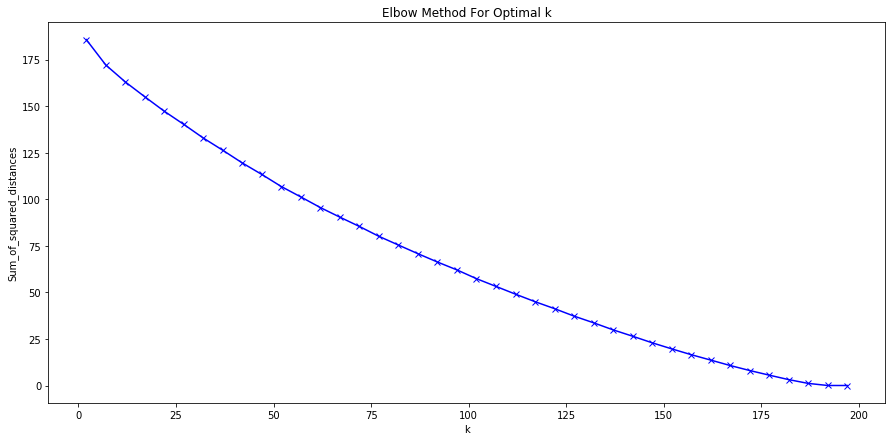

In [120]:
K = range(2,200,5)
Sum_of_squared_distances = [] 
for i in range(2,200,5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmean_indices = kmeans.fit(X)
    Sum_of_squared_distances.append(kmean_indices.inertia_)
    print ('Inertia Score for Kmeans', kmean_indices.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# print (kmean_indices)
# data['Kmeans(5)_TfIDF'] = kmean_indices
# data['Kmeans(5)_TfIDF'].to_csv('data_Results.csv', index=False)
# print ('================================================================')
# new_kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 0)
# new_kmeans_indices = new_kmeans.fit_predict(X_new)
# print(new_kmeans_indices)
# pca = PCA(n_components=2)
# scatter_plot_points = pca.fit_transform(X.toarray())

# colors = ["r", "b", "c", "y", "m" ]

# x_axis = [o[0] for o in scatter_plot_points]
# y_axis = [o[1] for o in scatter_plot_points]
# fig, ax = plt.subplots(figsize=(200,100))

# ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

# for i, txt in enumerate(data['Text']):
#     ax.annotate(txt, (x_axis[i], y_axis[i]))

In [113]:
print("Top terms per cluster:")

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(20):
    print("========================================================================")
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),


print("\n")


Top terms per cluster:
Cluster 0:
 sri
 cricket
 lanka
 pakistan
 hamm
 women
 jones
 mcclaren
 cup
 twenty20
Cluster 1:
 pakistan
 australia
 test
 ponting
 shoaib
 runs
 mohammad
 innings
 series
 wickets
Cluster 2:
 drugs
 greek
 iaaf
 doping
 kenteris
 athletes
 tests
 thanou
 sprinters
 collins
Cluster 3:
 souness
 bellamy
 newcastle
 transfer
 graeme
 window
 manager
 chairman
 chelsea
 defender
Cluster 4:
 roddick
 moya
 davis
 cup
 spain
 nadal
 singles
 final
 clay
 beat
Cluster 5:
 england
 wales
 williams
 ireland
 nations
 scotland
 half
 italy
 rugby
 france
Cluster 6:
 indoor
 world
 60m
 olympic
 record
 greene
 idowu
 edwards
 gold
 birmingham
Cluster 7:
 players
 beckham
 arsenal
 game
 said
 team
 henry
 club
 chelsea
 spain
Cluster 8:
 athletics
 athens
 sullivan
 year
 race
 mcilroy
 walker
 campbell
 isinbayeva
 000m
Cluster 9:
 chepkemei
 radcliffe
 marathon
 cross
 paula
 country
 race
 london
 world
 york
Cluster 10:
 england
 south
 vaughan
 africa
 strauss
 da

In [101]:
###### Starting With DBSCAN #######################
dbscan = DBSCAN(eps=1, min_samples= 2)
dbscan_model = dbscan.fit(X)
labels = dbscan_model.labels_
print(labels)
data['DBSCAN'] = labels
data['DBSCAN'].to_csv('data_Results.csv', index=False)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1 -1 -1  2  2  3  1  0  1 -1  2 -1
 -1  4 -1 -1 -1 -1 -1  3  2 -1  4  5 -1 -1  5 -1 -1 -1 -1  6 -1  7  8 -1
  7  7  8 -1 -1 -1 -1 -1 -1  9  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 10 10 -1 -1
  6 -1 -1 -1 -1 -1 -1 11 -1 12 11 11 13 12 12 12 14 -1 -1 -1 -1 13 -1 -1
 -1 15 -1 15 -1 -1 -1 -1 -1 -1 -1 -1 14 -1 -1 16 16 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 17 17 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 18
 18 -1 -1 -1 19 -1 -1 -1 -1 -1 -1 -1 -1 20 -1 -1 20 -1 21 21 -1 -1 -1 -1
 -1 -1 -1 22 -1 -1 -1 -1 -1 22 -1 19 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


In [102]:
cluster_labels = []
for item in labels:
    if (item == -1 ):
        cluster_labels.append(0)
    else :
        cluster_labels.append(item+1)

In [103]:
print(cluster_labels)
data['DBSCAN'] = cluster_labels
data['DBSCAN'].to_csv('data_Results.csv', index=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 3, 4, 2, 1, 2, 0, 3, 0, 0, 5, 0, 0, 0, 0, 0, 4, 3, 0, 5, 6, 0, 0, 6, 0, 0, 0, 0, 7, 0, 8, 9, 0, 8, 8, 9, 0, 0, 0, 0, 0, 0, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 0, 0, 7, 0, 0, 0, 0, 0, 0, 12, 0, 13, 12, 12, 14, 13, 13, 13, 15, 0, 0, 0, 0, 14, 0, 0, 0, 16, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 17, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 19, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 21, 0, 22, 22, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 23, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
from sklearn import metrics
print ('Silhouette Score for DBSCAN', metrics.silhouette_score(X,labels))

Silhouette Score for DBSCAN 0.07712453150023418


In [116]:
print ('Inertia Score for Kmeans', kmean_indices.inertia_)

Inertia Score for Kmeans 128.7228435223403
